In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smsformula
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

pd.set_option("display.max_columns", 500)

In [6]:
credit = pd.read_csv('UCI_Credit_Card.csv')

In [9]:
credit.head()

,ID,BALLIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,PAYSEPFL,PAYAUGFL,PAYJULFL,PAYJUNEFL,PAYMAYFL,PAYAPRFL,BILLSEP,BILLAUG,BILLJUL,BILLJUNE,BILLMAY,BILLAPR,PAYSEP,PAYAUG,PAYJUL,PAYJUNE,PAYMAY,PAYAPR,DEFAULT
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Flags:
-2: inactive account
-1: paid duly
0: use of revolving credit
1: payment delay for one month
2: payment delay for two months
.
.
.
.
.
8: payment delay for eight months

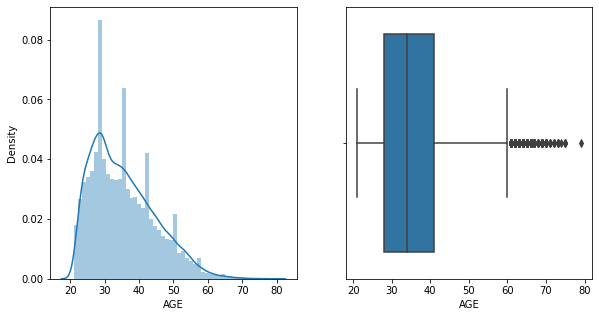

In [10]:
plt.figure(figsize= (15,5))

plt.subplot(1,3,1)
sns.distplot(credit['AGE'])

plt.subplot(1,3,2)
sns.boxplot(credit['AGE'])
plt.show()

In [12]:
credit['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [14]:
credit['AGE'].skew(), credit['AGE'].kurt()

(0.7322458687830562, 0.04430337823580954)

0.47924232857778376


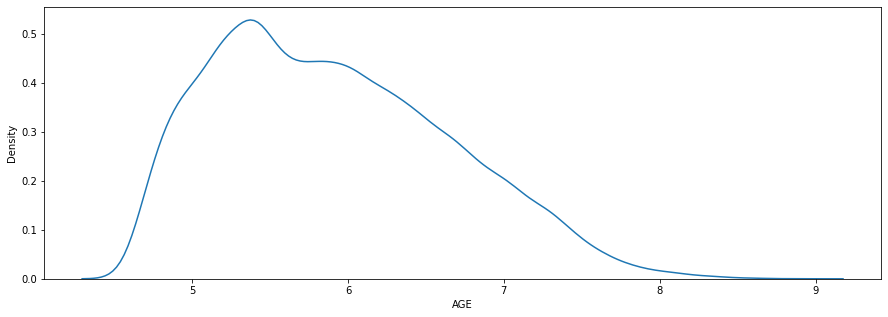

In [15]:
print(np.sqrt(credit['AGE']).skew())
plt.figure(figsize = (15,5))
sns.distplot(np.sqrt(credit['AGE']), hist=False)
plt.show()

0.2892635438926005


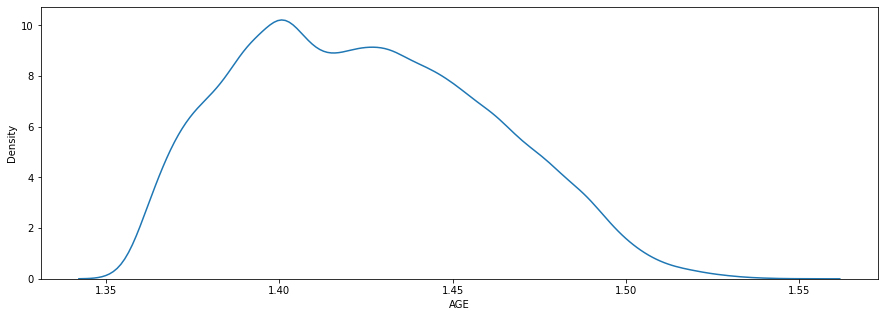

In [16]:
print((credit['AGE']**0.1).skew())
plt.figure(figsize = (15,5))
sns.distplot(credit['AGE']**0.1, hist = False)
plt.show()

0.24323316187852934


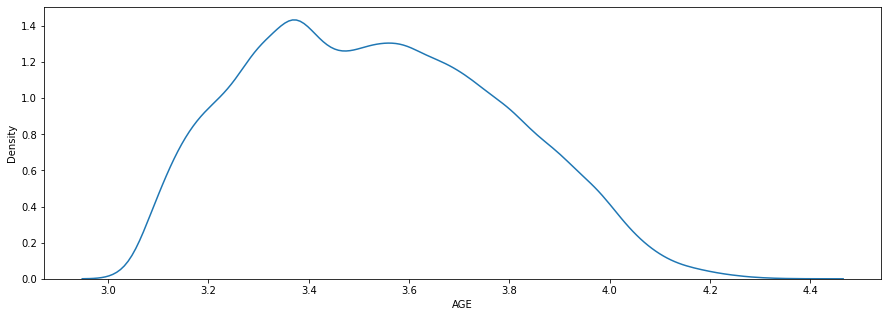

In [17]:
print(np.log(credit['AGE']**0.1).skew())
plt.figure(figsize = (15,5))
sns.distplot(np.log(credit['AGE']), hist = False)
plt.show()

Log transformation is the best since it has reduced the skewness to 0.24

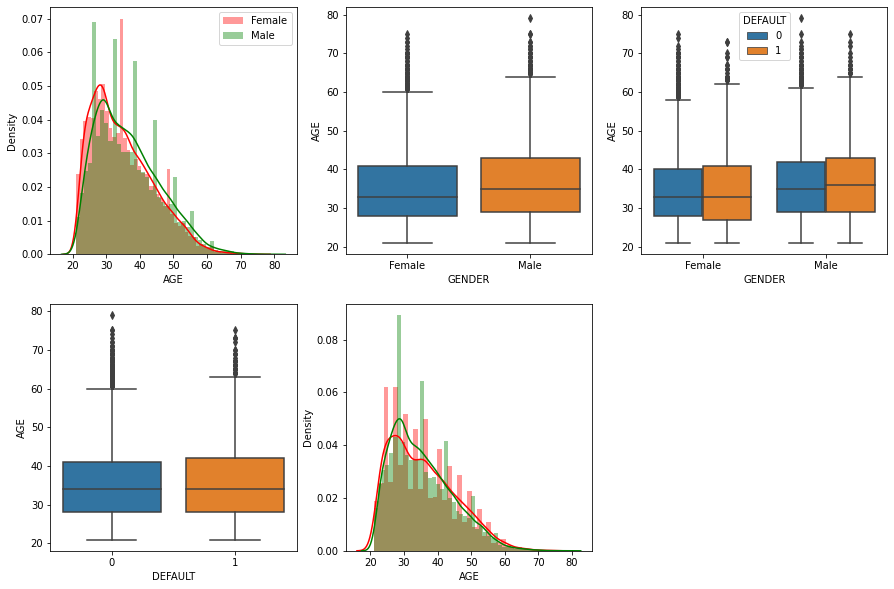

In [18]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.distplot(credit[credit['GENDER']=='Female']['AGE'], color = 'r', label = 'Female')
sns.distplot(credit[credit['GENDER']=='Male']['AGE'], color = 'g', label = 'Male')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(credit['GENDER'], credit['AGE'])
plt.subplot(2,3,3)
sns.boxplot(credit['GENDER'], credit['AGE'], hue = credit['DEFAULT'])
plt.subplot(2,3,4)
sns.boxplot(credit['DEFAULT'], credit['AGE'])
plt.subplot(2,3,5)
sns.distplot(credit[credit['DEFAULT']==1]['AGE'], color = 'r', label = '1')
sns.distplot(credit[credit['DEFAULT']==0]['AGE'], color = 'g', label = '0')
plt.show()


In [19]:
credit.groupby('DEFAULT')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,28.0,34.0,41.0,79.0
1,6636.0,35.725738,9.693438,21.0,28.0,34.0,42.0,75.0


In [23]:
credit.groupby(['DEFAULT','GENDER'])['AGE'].describe()

count       mean       std   min   25%   50%   75%   max
DEFAULT GENDER                                                            
0       Female  14349.0  34.781866  8.868165  21.0  28.0  33.0  40.0  75.0
        Male     9015.0  36.428619  9.312213  21.0  29.0  35.0  42.0  79.0
1       Female   3763.0  34.902206  9.620276  21.0  27.0  33.0  41.0  73.0
        Male     2873.0  36.804386  9.684725  21.0  29.0  36.0  43.0  75.0

In [24]:
group1 = credit[credit['DEFAULT']==1]
group1 = group1['AGE']

group2 = credit[credit['DEFAULT']==0]
group2 = group2['AGE']

In [25]:
from scipy.stats import ttest_ind

In [26]:
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

2.40594177499625 0.016136845890163832


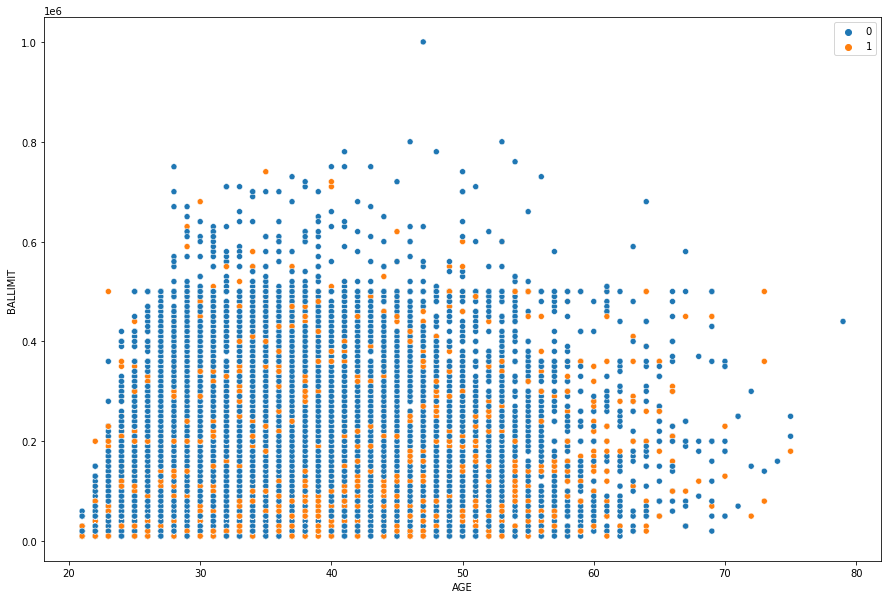

In [28]:
plt.figure(figsize = (15,10))

#plt.subplot(2,3,1)
sns.scatterplot(credit['AGE'], credit['BALLIMIT'], hue = credit['DEFAULT'])
plt.legend()
plt.show()

In [29]:
credit['AGE'].corr(credit['BALLIMIT'])

0.14471279755733582

In [30]:
credit['EDUCATION'].unique()

array(['University', 'Graduate', 'High School', 'Not Graduated', '4', '6',
       '0'], dtype=object)

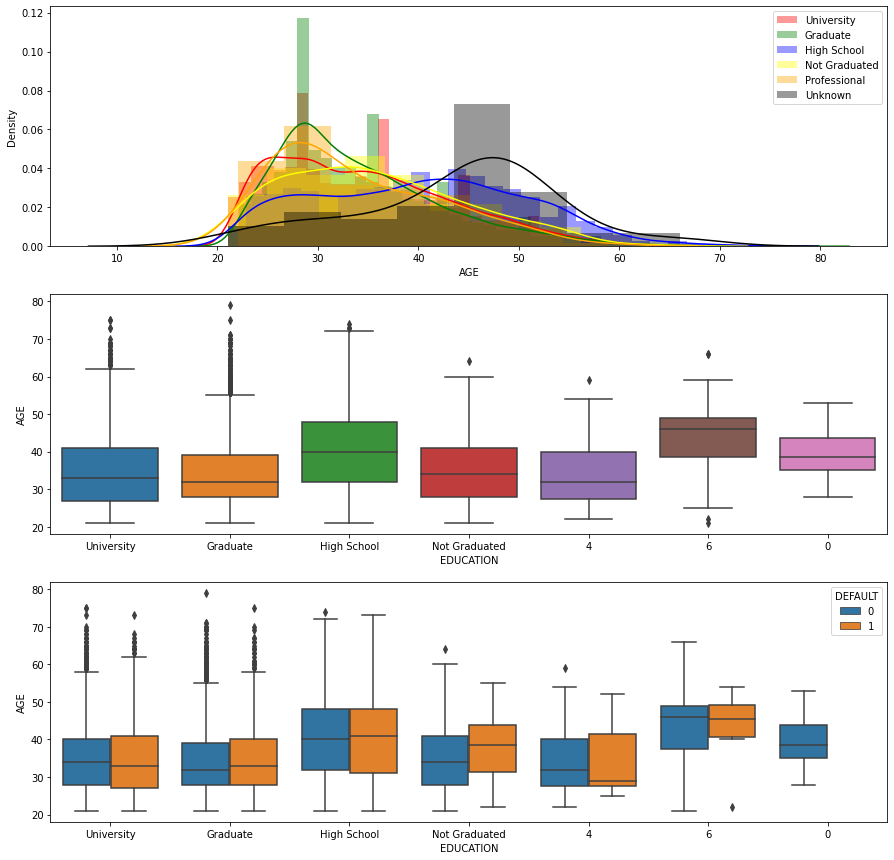

In [31]:
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.distplot(credit[credit['EDUCATION']=='University']['AGE'], color = 'red', label='University')
sns.distplot(credit[credit['EDUCATION']=='Graduate']['AGE'], color = 'green', label='Graduate')
sns.distplot(credit[credit['EDUCATION']=='High School']['AGE'], color = 'blue', label='High School')
sns.distplot(credit[credit['EDUCATION']=='Not Graduated']['AGE'], color = 'yellow', label='Not Graduated')
sns.distplot(credit[credit['EDUCATION']=='4']['AGE'], color = 'orange', label='Professional')
sns.distplot(credit[credit['EDUCATION']=='6']['AGE'], color = 'black', label='Unknown')
plt.legend()

plt.subplot(3,1,2)
sns.boxplot(credit['EDUCATION'], credit['AGE'])
plt.subplot(3,1,3)
sns.boxplot(credit['EDUCATION'], credit['AGE'], hue = credit['DEFAULT'])
plt.show()